**Dictionary definition :** Statistics is the science that deals with the collection, tabulation, and systematic classification of quantitative data, especially as a basis for inference and induction.

**Easier definition :**  Statistics is a way to convert numbers into useful information so that good decisions can be made.

The term **inference** refers to a key concept in statistics in which we draw a conclusion from available evidence.

The purpose of **descriptive statistics** is to summarize or display data so we can quickly obtain an overview.

**Inferential statistics** allows us to make claims or conclusions about a population based on a sample of data from that population.

A **population** represents all possible outcomes or measurements of interest. A sample is a subset of a population.


**Use the Titanic dataset part of Seaborn package**

In [1]:
from matplotlib import pyplot as plt
import seaborn as sb

df = sb.load_dataset('titanic')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Quantitative data** uses numerical values to describe something of interest.  

**Qualitative data** uses descriptive terms to measure or classify something of interest


A **nominal level** of measurement deals strictly with qualitative data. Observations are simply assigned to predetermined categories. One example is gender of the respondent, with the categories being male and female.

**Ordinal** is the next level up. It has all the properties of nominal data with the added feature that we can rank-order the values from highest to lowest.

**Interval level** is strictly quantitative data. Now we can get to work with the mathematical operations of addition and subtraction when comparing values.  However, multiplication and division can’t be performed on this data. Temperature measurement in degrees is a good example.  We cannot argue that 100 degrees is twice as warm as 50.

We can perform all four mathematical operations on **ratio level** data. Examples of this type of data are age, weight, height, and salary.  Ratio data has all the features of interval data with the added benefit of a true 0 point.




---



There exist two broad categories of descriptive statistics that are commonly used.

**Measures of central tendency** describe the centre point of a data set with a single value.

**Measures of dispersion** describe how far individual data values have strayed from the centre point .

The most common measure of central tendency is the **mean** or average, which we calculate by adding all the values in our data set and then dividing this result by the number of observations.




---



The **median** is the value in the data set for which half the observations are higher and half the observations are lower. We find the median by arranging the data values in ascending order and identifying the halfway point.

The last measure of central tendency is the **mode**, which is simply the observation in the data set that occurs the most frequently.

When to use what?

* If you think all the data in your data set is relevant, then the mean is your best choice. This measurement is affected by both the number and magnitude of your values. However, very small or very large values can have a significant impact on the mean, especially if the size of the sample is small.

* If this is a concern, perhaps you should consider using the median. The median is not as sensitive to a very large or small value.

* Mode has limited applications. It is primarily used to describe data at the nominal scale—that is, data that is grouped in descriptive categories such as gender.


In [2]:
import statistics as st

print(st.mode(df['sex']))
print(st.mean(df['fare']))
print(st.median(df['fare']))


male
32.204207968574636
14.4542


**Measures of dispersion**

The **range** is the simplest measure of dispersion and is calculated by finding the difference between the highest value and the lowest value in the data set.

The range is a quick way to get a feel for the spread of the data set.  However, the limitation is that it only relies on two data points to describe the variation in the sample.

The **variance** is a measure of dispersion that describes the relative distance between the data points in the set and the mean of the data set. This measure is widely used in inferential statistics.  

A **standard deviation** is the square root of a variance.


In [3]:
print(st.stdev(df['fare']))
print(st.variance(df['fare']))

49.6934285971809
2469.4368457431165


/tmp/ipython-input-767016691.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['fare'], bins=10)


<Axes: xlabel='fare', ylabel='Density'>

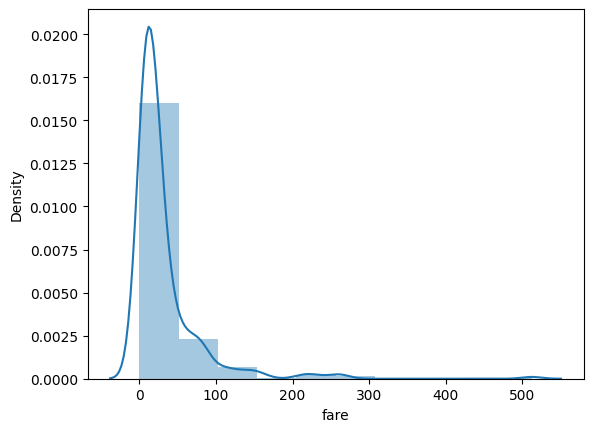

In [20]:
# view the fare distribution
sb.distplot(df['fare'], bins=10)

<Axes: xlabel='fare', ylabel='Density'>

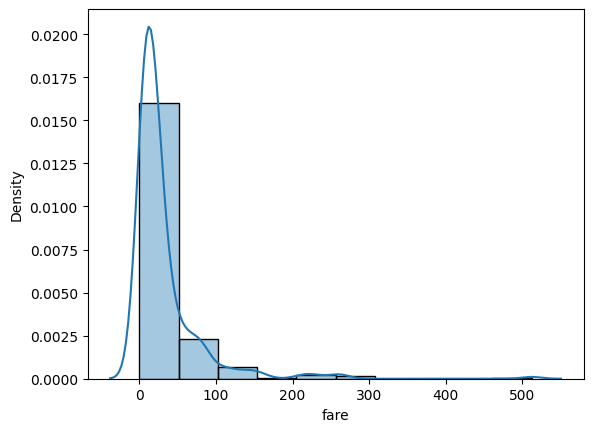

In [27]:
# view the fare distribution
sb.histplot(df['fare'], bins=10, kde=True, stat='density', kde_kws=dict(cut=3),alpha=.4,
)

**Measures of Relative position**

* Another way of looking at dispersion of data is through measures of relative position, which describe the percentage of the data below a certain point. This technique includes quartile and interquartile measurements.

* Quartiles measure the relative position of the data values by dividing the data set into four equal segments.

* When you have established the quartiles, you can easily calculate the interquartile range (IQR); the IQR measures the spread of the centre half of our data set. It is simply the difference between the third and first quartiles,

* The interquartile range is used to identify outliers, which are the “black sheep” of our data set. These are extreme values whose accuracy is questioned and can cause unwanted distortions in statistical results


In [28]:
# Viw the distribution by percentiles
import numpy as np
print(np.percentile(df['fare'],25))
print(np.percentile(df['fare'],50))
print(np.percentile(df['fare'],75))
print(np.percentile(df['fare'],99))

7.9104
14.4542
31.0
249.00622000000035


In [ ]:
# View IQR for fare
iqr=np.percentile(df['fare'],75)-np.percentile(df['fare'],25)
print(iqr)

23.0896


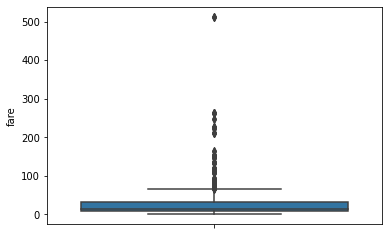

In [ ]:
# View box plot for fare
sb.boxplot(y = "fare", data = df)
plt.show()

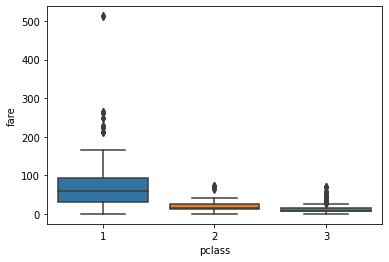

In [ ]:
# View box plot for fare for each class
sb.boxplot(x = "pclass", y = "fare", data = df)
plt.show()

**Skewness**:
* It is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution.

* Positive Skewness means when the tail on the right side of the distribution is longer or fatter.

* Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side.

**Kurtosis**:
* It is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.

* High kurtosis in a data set is an indicator that data has heavy tails or outliers.  - Black

* Low kurtosis in a data set is an indicator that data has light tails or lack of outliers. - Green


In [ ]:
# Skewness
from scipy.stats import skew
print( 'skewness of normal distribution (should be 0): {}'.format( skew(df['fare']) ))


skewness of normal distribution (should be 0): 4.7792532923723545


In [ ]:
# Kurtosis
from scipy.stats import kurtosis
print( 'kurtosis of normal distribution (should be 3): {}'.format( kurtosis(df['fare']) ))


kurtosis of normal distribution (should be 3): 33.20428925264474


**Empirical Rule:**
The values of many large data sets tend to cluster around the mean or median so that the data distribution in the histogram resembles a bell-shape, symmetrical curve.


**Central Limit Theorem:**

* The Central Limit Theorem, or CLT for short, is an important finding and pillar in the fields of statistics and probability.

* The finding is critically important for making inferences in applied machine learning.

* The theorem states that as the size of the sample increases, the distribution of the mean across multiple samples will approximate a Gaussian or Normal distribution.

* The central limit theorem is impressive, especially as this will occur no matter the shape of the population distribution from which we are drawing samples.

* In order to make inferences about the skill of a model compared to the skill of another model, we must use tools such as statistical significance tests.  CLT is the basis for this


[6 4 5 1 2 4 6 1 1 2 5 6 5 2 3 5 6 3 5 4 5 3 5 6 3 5 2 2 1 6 2 2 6 2 2 1 5
 2 1 1 6 4 3 2 1 4 6 2 2 4]
3.44


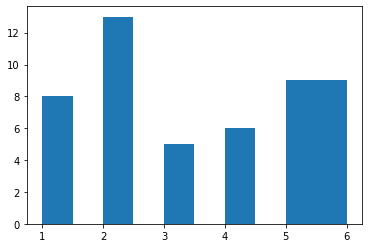

In [ ]:
#Central Limit Theorem

# generate random dice rolls and view the mean
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a sample of 50 die rolls and note the mean - This is one experiment
rolls = randint(1, 7, 50) # try with 500 and 5000 also
print(rolls)
print(mean(rolls))

pyplot.hist(rolls)
pyplot.show()

[3.44, 3.32, 3.44, 3.62, 3.68, 3.24, 3.84, 3.36, 3.36, 3.4, 3.76, 3.9, 3.46, 3.52, 2.98, 3.62, 3.36, 3.5, 3.34, 3.66, 3.58, 3.84, 3.76, 3.52, 3.52, 3.34, 3.18, 3.58, 3.64, 3.46, 3.38, 3.34, 2.9, 3.86, 3.58, 3.34, 3.68, 3.44, 3.88, 3.18, 3.68, 3.24, 3.36, 3.66, 3.72, 3.72, 3.34, 3.54, 3.64, 3.06, 3.48, 3.48, 3.46, 3.52, 3.48, 3.54, 3.56, 3.32, 3.06, 3.84, 3.64, 3.44, 3.08, 3.92, 3.12, 3.6, 3.46, 3.8, 3.38, 3.72, 3.1, 3.5, 3.38, 3.52, 3.16, 3.98, 3.92, 3.84, 3.8, 3.72, 3.62, 3.72, 3.72, 3.54, 3.92, 2.88, 3.32, 3.56, 3.44, 3.86, 3.56, 3.56, 3.6, 3.1, 3.76, 3.68, 3.48, 3.26, 3.6, 3.52, 3.94, 3.5, 3.74, 3.62, 3.64, 3.24, 3.88, 3.66, 3.54, 3.44, 3.62, 3.78, 3.36, 3.2, 3.74, 3.54, 3.62, 4.02, 3.86, 3.64, 3.62, 3.86, 4.08, 3.04, 3.52, 3.82, 3.44, 3.66, 3.5, 3.48, 3.46, 3.68, 3.64, 3.48, 3.9, 3.7, 3.48, 3.38, 3.32, 3.68, 3.22, 3.96, 3.6, 3.6, 3.48, 3.04, 3.8, 3.12, 3.46, 3.94, 3.5, 3.7, 3.5, 3.22, 3.44, 3.24, 3.62, 3.74, 3.3, 3.54, 3.72, 3.44, 3.42, 3.44, 3.62, 3.26, 3.3, 3.56, 3.3, 3.82, 3.22,

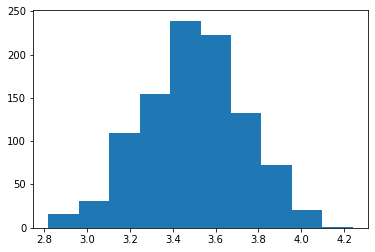

In [ ]:
# Create 1000 means and see the distribution
from numpy.random import seed
from numpy.random import randint
from numpy import mean
from matplotlib import pyplot

# seed the random number generator
seed(1)
# calculate the mean of 50 dice rolls 1000 times
means = [mean(randint(1, 7, 50)) for x in range(1000)]
# plot the distribution of sample means
print(means)
pyplot.hist(means)
pyplot.show()